In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests, os, io

# Data Exploration and Visualization of the bad-drivers data from fivethirtyeight

We will download the data from github

In [2]:
# Repo: https://github.com/fivethirtyeight/data/tree/master/food-world-cup

url="https://raw.githubusercontent.com/fivethirtyeight/data/master/bad-drivers/bad-drivers.csv"

if not os.path.isfile('./data/data.csv'):
    print('Downloading file')
    download = requests.get(url).content
    with open('./data/data.csv','w+') as f:
        f.write(download.decode('utf-8'))

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv('./data/data.csv',na_values='NaN')

In [3]:
df.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [4]:
columns = ['State','n_drivers_per_billion','perc_drivers_speeding','perc_drivers_alcohol','perc_drivers_no_distraction','perc_drivers_no_prev_','car_insurance_dollars','loss_by_insur_per_driver']
df.columns = columns

In [5]:
from usa_states import usa_states
usa_states_dict = dict((v,k) for k,v in usa_states.items())
df['state_code'] = df['State'].map(usa_states_dict, na_action='ignore')


In [6]:
df.head()

,State,n_drivers_per_billion,perc_drivers_speeding,perc_drivers_alcohol,perc_drivers_no_distraction,perc_drivers_no_prev_,car_insurance_dollars,loss_by_insur_per_driver,state_code
0,Alabama,18.8,39,30,96,80,784.55,145.08,AL
1,Alaska,18.1,41,25,90,94,1053.48,133.93,AK
2,Arizona,18.6,35,28,84,96,899.47,110.35,AZ
3,Arkansas,22.4,18,26,94,95,827.34,142.39,AR
4,California,12.0,35,28,91,89,878.41,165.63,CA


Looking at the number drivers involved in collisions by states, it seems North Dakota, West Virginia and South Carolina have recorded high figures.

In [7]:
import plotly.express as px
fig = px.choropleth(df, 
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    hover_data=["State","n_drivers_per_billion"],
                    color='n_drivers_per_billion',
                    )
fig.update_layout(
      title_text = 'Number of drivers involved in fatal collisions per billion miles',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

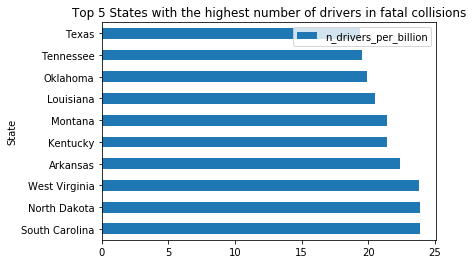

In [46]:

df_top_10 = df[['State','n_drivers_per_billion']].sort_values(by='n_drivers_per_billion',ascending=False).iloc[:10,:]
df_top_10.plot(x='State',y='n_drivers_per_billion',title="Top 5 States with the highest number of drivers in fatal collisions",kind='barh')
